In [1]:
import numpy as np 
import pandas as pd 
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime 

In [2]:
topics = pd.read_csv('all/documents_topics.csv')
print('Columns:',topics.columns.tolist())
print('Number of unique topics:', len(topics.topic_id.unique()))

topics.head()

Columns: ['document_id', 'topic_id', 'confidence_level']
Number of unique topics: 300


,document_id,topic_id,confidence_level
0,1595802,140,0.073113
1,1595802,16,0.059416
2,1595802,143,0.045421
3,1595802,170,0.038867
4,1524246,113,0.196450


In [5]:
topic_ids = topics.groupby('topic_id')['confidence_level'].count().sort_values()

for i in [10000, 50000, 100000, 200000]:
    print('Number of topics that appear more than {} times: {}'
          .format(i, (topic_ids > i).sum()))

Number of topics that appear more than 10000 times: 201
Number of topics that appear more than 50000 times: 86
Number of topics that appear more than 100000 times: 22
Number of topics that appear more than 200000 times: 3


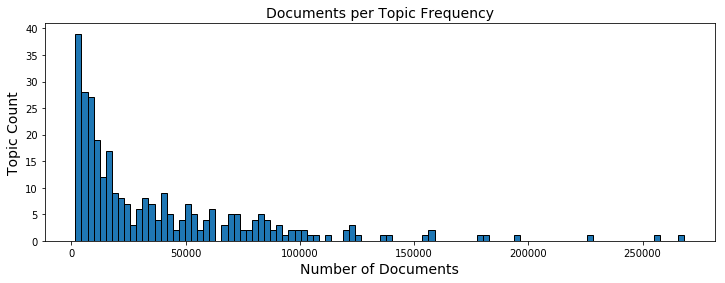

In [7]:
plt.figure(figsize=(12,4))
plt.hist(topics.groupby("topic_id").agg({"topic_id":pd.Series.count}).as_matrix(), bins=100,edgecolor='black')
plt.title('Documents per Topic Frequency', fontsize=14)
plt.xlabel('Number of Documents', fontsize=14)
plt.ylabel('Topic Count', fontsize=14)
plt.show()

In [14]:
def printGroupInfo(df):
    print("\nTop 10:\n", df.apply(lambda x: x.sort_values(ascending=False)).head(10))
printGroupInfo(topics.groupby("topic_id").agg({"topic_id":pd.Series.count}))


Top 10:
           topic_id
topic_id          
16          268216
184         256028
20          226877
140         195645
143         181260
181         177946
107         157643
235         156856
49          154783
8           139734


In [17]:
events = pd.read_csv("all/events.csv", dtype=np.int32, index_col=0, usecols=[0,3])
train = pd.merge(pd.read_csv("all/clicks_train.csv", dtype=np.int32, index_col=0).sample(frac=0.1),events, left_index=True, right_index=True)
test = pd.merge(pd.read_csv("all/clicks_test.csv", dtype=np.int32, index_col=0).sample(frac=0.1),events, left_index=True, right_index=True)

test["hour"] = (test.timestamp // (3600 * 1000)) % 24
test["day"] = test.timestamp // (3600 * 24 * 1000)

train["hour"] = (train.timestamp // (3600 * 1000)) % 24
train["day"] = train.timestamp // (3600 * 24 * 1000)

/Users/vaishnavisabhahith/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:466: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Text(0,0.5,'Fraction of Events')

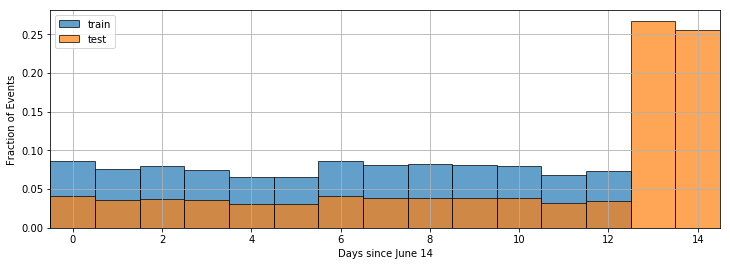

In [18]:
plt.figure(figsize=(12,4))
train.day.hist(bins=np.linspace(-.5, 14.5, 16), label="train", alpha=0.7, normed=True,edgecolor='black')
test.day.hist(bins=np.linspace(-.5, 14.5, 16), label="test", alpha=0.7, normed=True,edgecolor='black')
plt.xlim(-0.5, 14.5)
plt.legend(loc="best")
plt.xlabel("Days since June 14")
plt.ylabel("Fraction of Events")

In [20]:
T_DELTA = 1465876799998

In [22]:
print("Earliest Date:", datetime.datetime.fromtimestamp((min(events['timestamp']) + T_DELTA)//1000))
print("Latest Date:", datetime.datetime.fromtimestamp((max(events['timestamp']) + T_DELTA)//1000))

Earliest Date: 2016-06-13 21:00:00
Latest Date: 2016-06-28 20:59:59


Text(0,0.5,'Count')

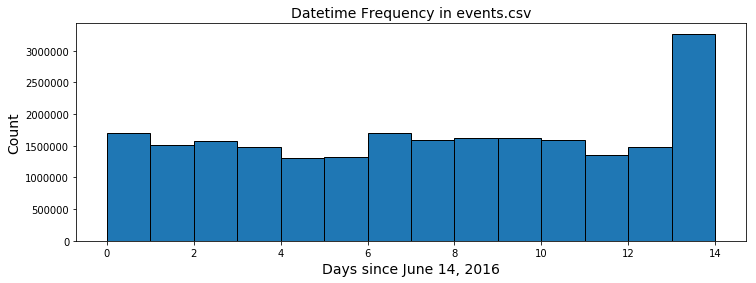

In [27]:
dateCounts = (events.timestamp)//(1000 * 3600 *24)

plt.figure(figsize=(12,4))
plt.hist(dateCounts.values.tolist(), bins=14,edgecolor='black')
plt.title('Datetime Frequency in events.csv', fontsize=14)
plt.xlabel('Days since June 14, 2016', fontsize=14)
plt.ylabel('Count', fontsize=14)

Text(0,0.5,'Count')

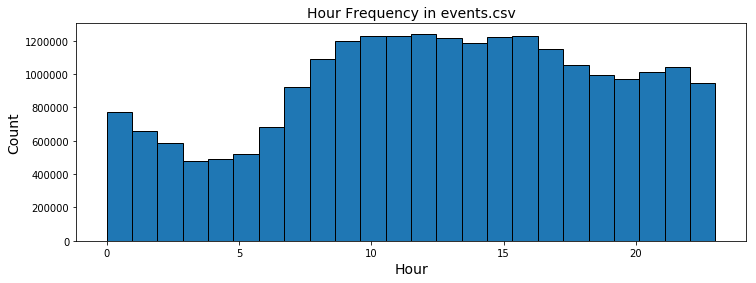

In [29]:
hourCounts = (events.timestamp)//(1000 * 3600) %24

plt.figure(figsize=(12,4))
plt.hist(hourCounts.values.tolist(), bins=24,edgecolor='black')
plt.title('Hour Frequency in events.csv', fontsize=14)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Count', fontsize=14)